# Data Visualization and Explanation
---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
from IPython.display import display
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [2]:
data_df = pd.read_csv("data_cleaned.csv")
data_df

,Unnamed: 0,helping_others_confidence,study_group_yesno,feel_confidence,feel_confidence2,study_group_preference,education_fulfillment,curr_class,curr_units,approx_gpa_year1,approx_gpa_win22_1,approx_gpa_win22_2,year,gender,age
0,0,3,Yes,1,3,Alone,3,CS105,12,3.5,3.9,3.43,Junior,Woman,21
1,1,5,No,3,4,Alone,4,CS111,14,3.9,3.75,3.81,Sophomore,Man,20
2,2,5,No,3,3,All the above,2,CS111,12,2.7,2.7,2.70,Sophomore,Man,19
3,3,4,Yes,4,4,In groups,4,CS105,17,3.9,3.9,3.90,Junior,Man,20
4,4,1,No,3,3,Alone,4,CS111,15,3.4,3.4,3.40,Junior,Man,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,84,4,Yes,4,4,Partner,5,CS105,11,4.0,4,4.00,Junior,Woman,21
85,85,3,Yes,2,3,Partner,3,CS141,12,3.2,3,3.33,Junior,Man,21
86,86,5,No,4,3,Partner,4,cs150,12,2.9,NaN,2.50,Senior,Woman,21
87,87,3,No,3,3,Partner,4,CS111,17,3.5,2.85,3.22,Sophomore,Man,19


5    34
4    29
3    14
2     8
1     4
Name: helping_others_confidence, dtype: int64

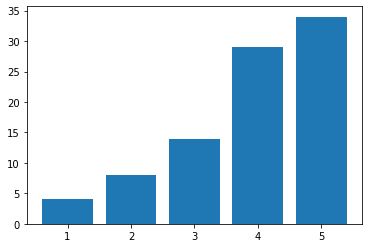

In [3]:
d1 = data_df["helping_others_confidence"]
d2 = d1.value_counts()
display(d2)
plt.bar(d2.index,d2)
plt.show()

3    38
4    29
2    10
1     6
5     6
Name: feel_confidence2, dtype: int64

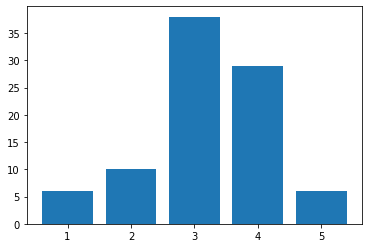

In [4]:
d1 = data_df["feel_confidence2"]
d3 = d1.value_counts()
display(d3)
plt.bar(d3.index,d3)
plt.show()

Alone            27
Partner          24
All the above    23
In groups        15
Name: study_group_preference, dtype: int64

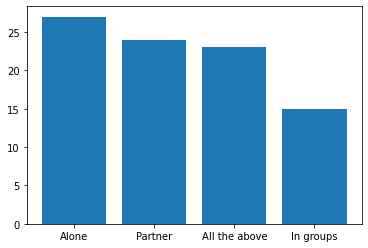

In [5]:
d1 = data_df["study_group_preference"]
d4 = d1.value_counts()
display(d4)
plt.bar(d4.index,d4)
plt.show()

study_group_preference,All the above,Alone,In groups,Partner
feel_confidence2,,,,
1,1,2,2,1
2,1,5,3,1
3,11,10,3,14
4,8,6,7,8
5,2,4,0,0


<AxesSubplot:xlabel='study_group_preference', ylabel='feel_confidence2'>

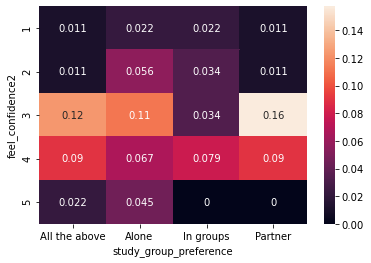

In [6]:
counts = pd.crosstab(data_df.feel_confidence2, data_df.study_group_preference)
display(counts)
joint = counts / counts.sum().sum()
sns.heatmap(joint,annot = True)

study_group_preference,All the above,Alone,In groups,Partner
feel_confidence2,,,,
1,0.043478,0.074074,0.133333,0.041667
2,0.043478,0.185185,0.200000,0.041667
3,0.478261,0.370370,0.200000,0.583333
4,0.347826,0.222222,0.466667,0.333333
5,0.086957,0.148148,0.000000,0.000000


<AxesSubplot:xlabel='feel_confidence2'>

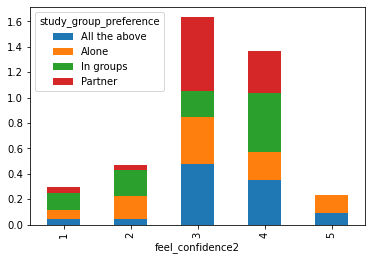

In [7]:
groupPreference_counts = counts.sum(axis=0)
confidence_given_groupPreference = counts.divide(groupPreference_counts, axis=1)
display(confidence_given_groupPreference)
confidence_given_groupPreference.plot.bar(stacked=True)

In [8]:

chi, p, dfree, expected = chi2_contingency(counts)
print("calculated chi square value: " ,chi)
print("degree of freedom: ", dfree)

calculated chi square value:  16.493743644746825
degree of freedom:  12


In [9]:
chi2.ppf(1-0.001, 12)

for 12 degree of freedom, the chi-square value needed to reject the hypothesis at the 0.001 significance level:


32.90949040736021